<a href="https://colab.research.google.com/github/hmdaalln/Group7/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK #4

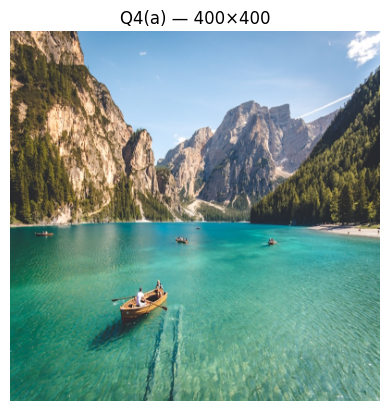

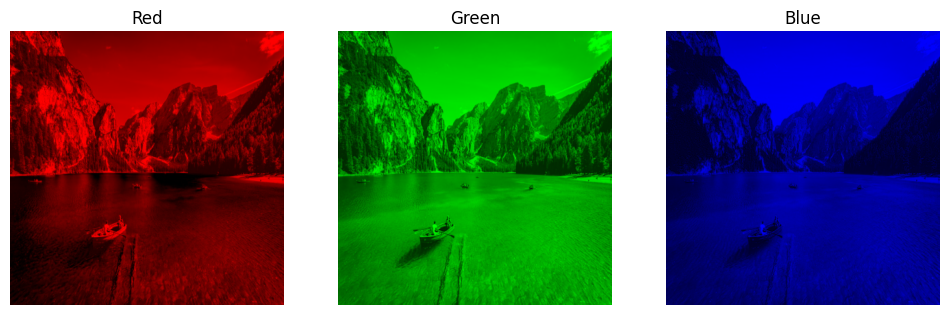

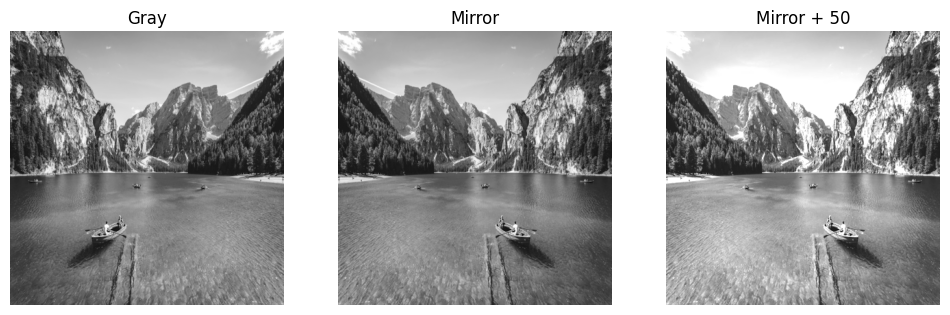

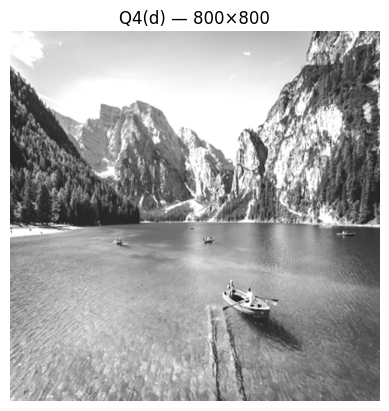

In [9]:
# Q4

import urllib.request
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#  Download the image once (if not already in folder) ---
url = "https://images.unsplash.com/photo-1501785888041-af3ef285b470?w=800"
urllib.request.urlretrieve(url, "ASG3.JPG")

# --- (a) Resize to 400x400 ---
img = cv.imread("ASG3.JPG")
img400 = cv.resize(img, (400, 400), interpolation=cv.INTER_AREA)
cv.imwrite("ASG3_400x400.jpg", img400)

plt.imshow(cv.cvtColor(img400, cv.COLOR_BGR2RGB))
plt.title("Q4(a) — 400×400")
plt.axis("off")
plt.show()

# --- (b) Split into R, G, B channels as color images ---
b, g, r = cv.split(img400)
zeros = np.zeros_like(b)

R_colored = cv.merge([zeros, zeros, r])
G_colored = cv.merge([zeros, g, zeros])
B_colored = cv.merge([b, zeros, zeros])

cv.imwrite("ASG3_R.jpg", R_colored)
cv.imwrite("ASG3_G.jpg", G_colored)
cv.imwrite("ASG3_B.jpg", B_colored)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv.cvtColor(R_colored, cv.COLOR_BGR2RGB)); plt.title("Red"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv.cvtColor(G_colored, cv.COLOR_BGR2RGB)); plt.title("Green"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv.cvtColor(B_colored, cv.COLOR_BGR2RGB)); plt.title("Blue"); plt.axis("off")
plt.show()

# --- (c) Grayscale → Mirror horizontally → Add 50 brightness ---
gray = cv.cvtColor(img400, cv.COLOR_BGR2GRAY)
gray_mirror = cv.flip(gray, 1)
gray_plus50 = cv.add(gray_mirror, 50)  # safely adds 50, max is 255

cv.imwrite("ASG3_gray.jpg", gray)
cv.imwrite("ASG3_gray_mirror.jpg", gray_mirror)
cv.imwrite("ASG3_gray_mirror_plus50.jpg", gray_plus50)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gray, cmap="gray"); plt.title("Gray"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(gray_mirror, cmap="gray"); plt.title("Mirror"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(gray_plus50, cmap="gray"); plt.title("Mirror + 50"); plt.axis("off")
plt.show()

# --- (d) Upscale to 800x800 using bicubic interpolation ---
gray800 = cv.resize(gray_plus50, (800, 800), interpolation=cv.INTER_CUBIC)
cv.imwrite("ASG3_gray_800x800.jpg", gray800)

plt.imshow(gray800, cmap="gray")
plt.title("Q4(d) — 800×800")
plt.axis("off")
plt.show()




Task #5

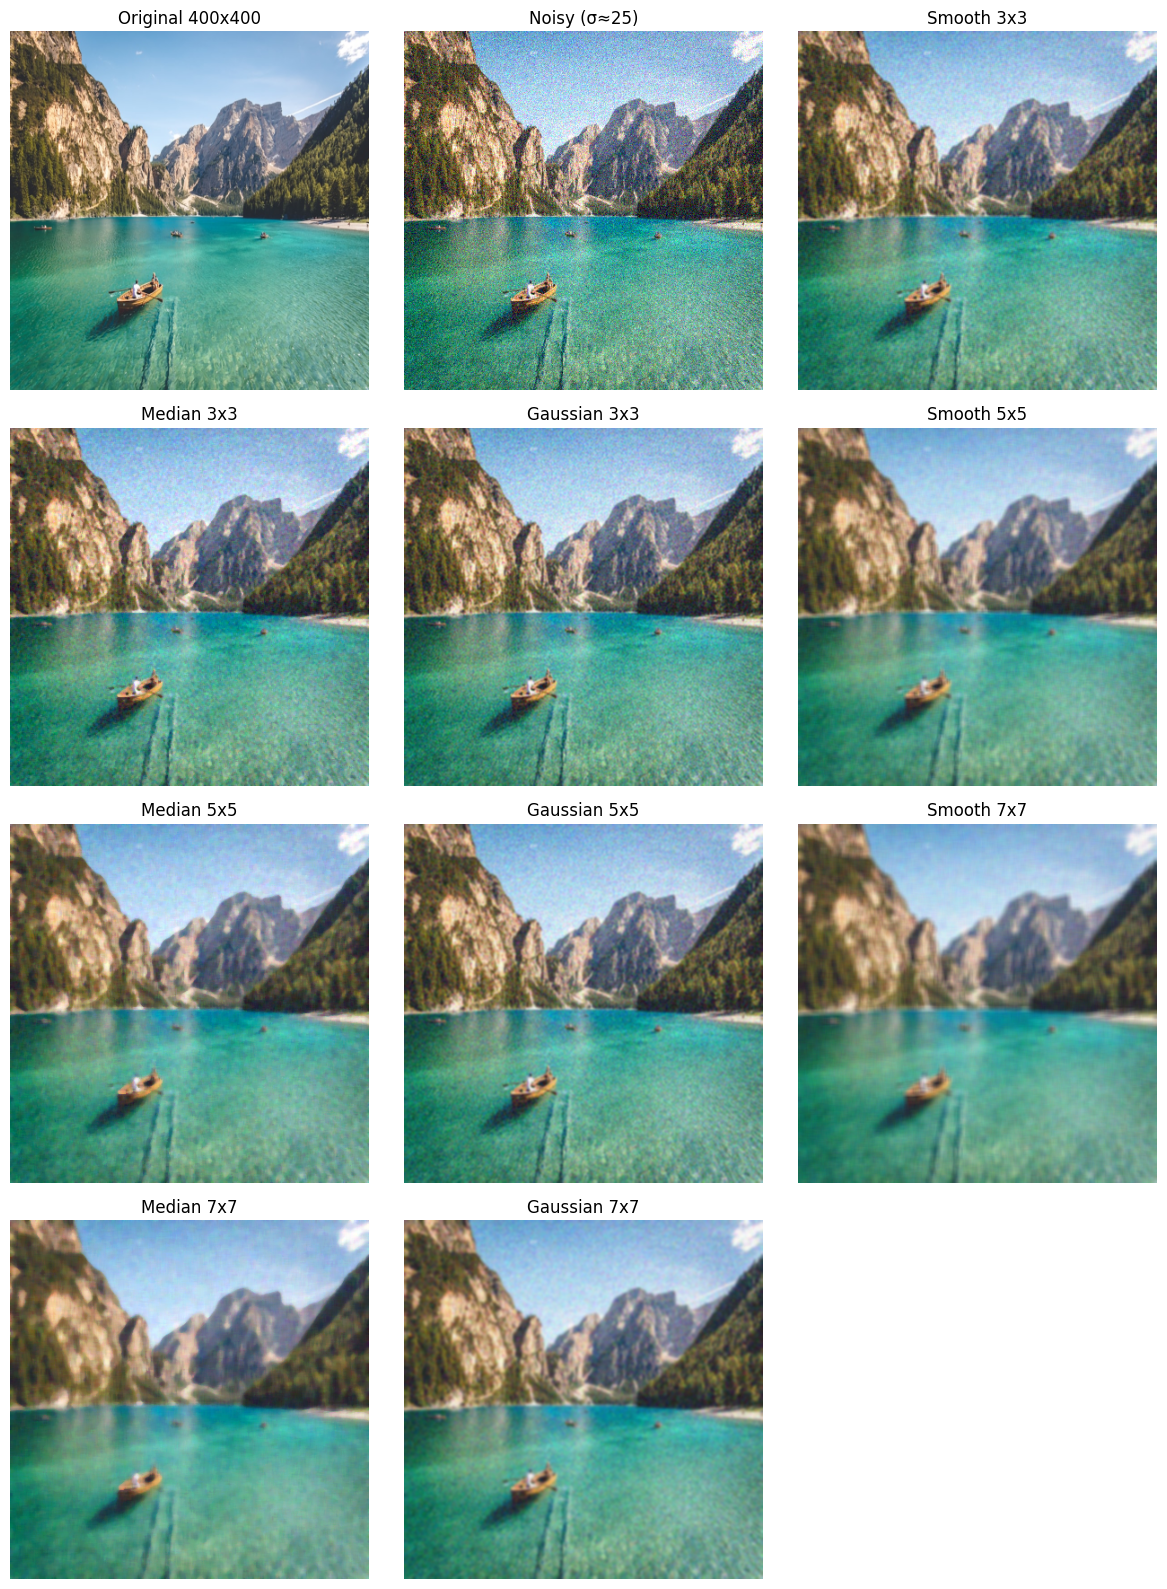

In [11]:
# Q5 – Beginner Version
# Add Gaussian noise to a 400x400 image, then filter with:
#   - Smoothing (average)
#   - Median
#   - Gaussian
# using kernel sizes 3x3, 5x5, 7x7

import urllib.request
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

# --------- (0) Get an image (download once if not there) ----------
if not os.path.exists("ASG3.JPG"):
    url = "https://images.unsplash.com/photo-1501785888041-af3ef285b470?w=800"
    urllib.request.urlretrieve(url, "ASG3.JPG")

# --------- (1) Load and make 400x400 (like Q4 output) -------------
img = cv.imread("ASG3.JPG")
img400 = cv.resize(img, (400, 400), interpolation=cv.INTER_AREA)
cv.imwrite("ASG3_400x400.jpg", img400)

# --------- (2) Add Gaussian noise (mean=0, sigma≈25) --------------
np.random.seed(0)  # (optional) repeatable results
sigma = 25.0
noise = np.random.normal(0, sigma, img400.shape).astype(np.float32)
noisy = np.clip(img400.astype(np.float32) + noise, 0, 255).astype(np.uint8)
cv.imwrite("T5_noisy.jpg", noisy)

# --------- (3) Apply filters for k = 3, 5, 7 ----------------------
ks = [3, 5, 7]
results = [("Original 400x400", img400), ("Noisy (σ≈25)", noisy)]

for k in ks:
    # Smoothing (average)
    smooth = cv.blur(noisy, (k, k))
    cv.imwrite(f"T5_smooth_{k}x{k}.jpg", smooth)
    results.append((f"Smooth {k}x{k}", smooth))

    # Median
    median = cv.medianBlur(noisy, k)
    cv.imwrite(f"T5_median_{k}x{k}.jpg", median)
    results.append((f"Median {k}x{k}", median))

    # Gaussian
    gauss = cv.GaussianBlur(noisy, (k, k), 0)
    cv.imwrite(f"T5_gaussian_{k}x{k}.jpg", gauss)
    results.append((f"Gaussian {k}x{k}", gauss))


# --------- (4) Quick gallery preview (optional) -------------------
cols = 3
rows = int(np.ceil(len(results)/cols))
plt.figure(figsize=(12, 4*rows))

for i, (title, im) in enumerate(results, 1):
    plt.subplot(rows, cols, i)
    plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


Task #6

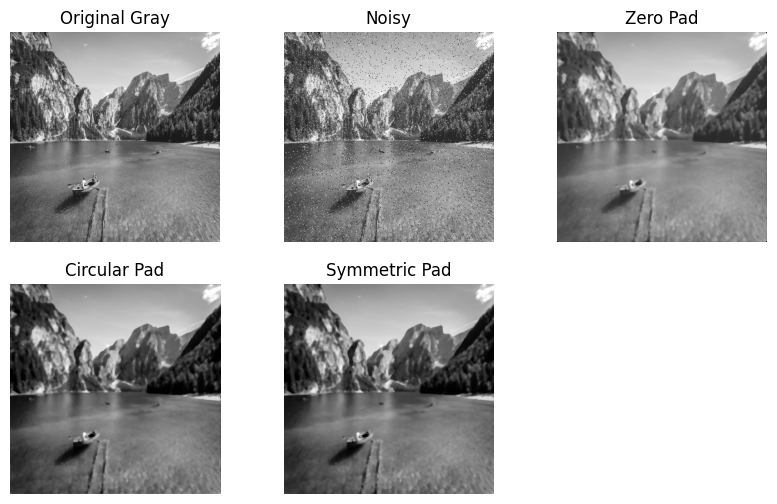

In [12]:
# Q6 – Salt & Pepper noise + Median filter (beginner version)

import urllib.request
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# (1) Download image if not already there
url = "https://images.unsplash.com/photo-1501785888041-af3ef285b470?w=800"
urllib.request.urlretrieve(url, "ASG3.JPG")

# (2) Read image → resize to 400x400 → convert to grayscale
img = cv.imread("ASG3.JPG")
gray = cv.cvtColor(cv.resize(img, (400, 400)), cv.COLOR_BGR2GRAY)

# (3) Add Salt & Pepper noise
def add_sp(img, amount=0.01):
    noisy = img.copy()
    h, w = img.shape
    num = int(amount * h * w)
    # salt
    coords = (np.random.randint(0,h,num), np.random.randint(0,w,num))
    noisy[coords] = 255
    # pepper
    coords = (np.random.randint(0,h,num), np.random.randint(0,w,num))
    noisy[coords] = 0
    return noisy

sp_noisy = add_sp(gray, 0.02)  # 2% noise
cv.imwrite("T6_sp_noisy.jpg", sp_noisy)

# (4) Median filter with 5x5 kernel and different paddings
zero      = cv.medianBlur(cv.copyMakeBorder(sp_noisy,2,2,2,2,cv.BORDER_CONSTANT),5)[2:-2,2:-2]
circular  = cv.medianBlur(cv.copyMakeBorder(sp_noisy,2,2,2,2,cv.BORDER_WRAP),5)[2:-2,2:-2]
symmetric = cv.medianBlur(cv.copyMakeBorder(sp_noisy,2,2,2,2,cv.BORDER_REFLECT),5)[2:-2,2:-2]

cv.imwrite("T6_median_zero.jpg", zero)
cv.imwrite("T6_median_circular.jpg", circular)
cv.imwrite("T6_median_symmetric.jpg", symmetric)

# (5) Show results
titles = ["Original Gray","Noisy","Zero Pad","Circular Pad","Symmetric Pad"]
images = [gray, sp_noisy, zero, circular, symmetric]

plt.figure(figsize=(10,6))
for i,(t,im) in enumerate(zip(titles,images),1):
    plt.subplot(2,3,i)
    plt.imshow(im,cmap="gray")
    plt.title(t)
    plt.axis("off")
plt.show()



Task #7

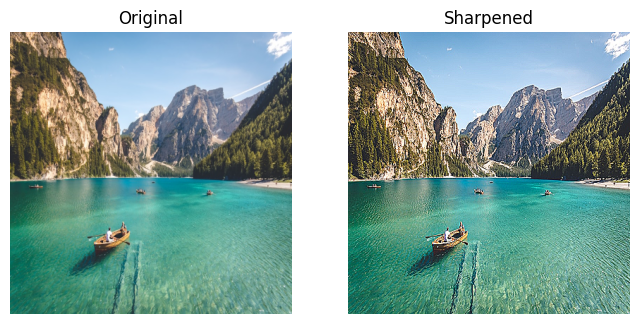

In [13]:
# Q7 – Beginner Version
# Sharpening an image with a 3x3 kernel

import urllib.request
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

# (1) Download image if not already there
if not os.path.exists("ASG3.JPG"):
    url = "https://images.unsplash.com/photo-1501785888041-af3ef285b470?w=800"
    urllib.request.urlretrieve(url, "ASG3.JPG")

# (2) Read image and resize to 400x400
img = cv.imread("ASG3.JPG")
img400 = cv.resize(img, (400, 400))
cv.imwrite("T7_original_400x400.jpg", img400)

# (3) Define sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype=np.float32)

# (4) Apply filter
sharpened = cv.filter2D(img400, -1, kernel)
cv.imwrite("T7_sharpen_400x400.jpg", sharpened)

# (5) Show results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(img400, cv.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB)); plt.title("Sharpened"); plt.axis("off")
plt.show()




Task #8

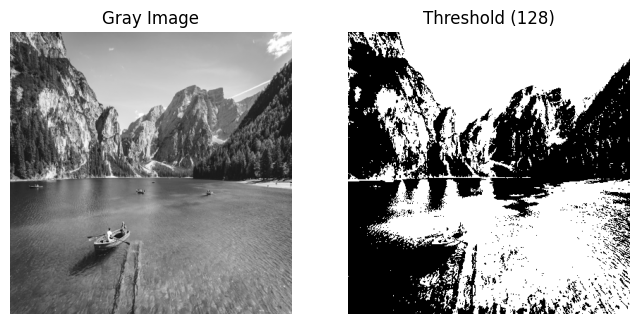

In [14]:
# Q8 – Beginner Version
# Thresholding (global threshold = 128) on a 400x400 grayscale image

import urllib.request
import cv2 as cv
import matplotlib.pyplot as plt
import os

# (1) Download image if not already saved
if not os.path.exists("ASG3.JPG"):
    url = "https://images.unsplash.com/photo-1501785888041-af3ef285b470?w=800"
    urllib.request.urlretrieve(url, "ASG3.JPG")

# (2) Read and resize to 400x400
img = cv.imread("ASG3.JPG")
img400 = cv.resize(img, (400, 400))

# (3) Convert to grayscale
gray = cv.cvtColor(img400, cv.COLOR_BGR2GRAY)
cv.imwrite("T8_gray_400x400.jpg", gray)

# (4) Apply threshold (128)
# Pixels >=128 → white (255), pixels <128 → black (0)
_, th = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)
cv.imwrite("T8_threshold_400x400.jpg", th)

# (5) Show results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap="gray"); plt.title("Gray Image"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(th, cmap="gray"); plt.title("Threshold (128)"); plt.axis("off")
plt.show()



Task #9

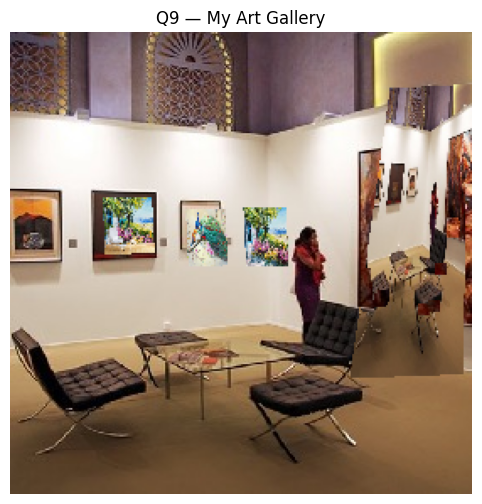

Saved: /content/Q9_gallery_result.jpg


In [3]:
# Q9 — Beginner Version (uses your Picture1.jpg + percentage corners)
# No folders, no clicking. Works in Colab or local PC (just change the paths).

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --------- INPUTS (change these paths if needed) ---------
GALLERY_PATH = "/content/Picture1.jpg"
ART_PATHS = [
    "/content/34.jpg",
    "/content/22.jpg",
    "/content/40.jpg",
    "/content/Picture1.jpg",
]

# Load images
gallery = cv.imread(GALLERY_PATH)
assert gallery is not None, f"Missing {GALLERY_PATH}"
arts = [cv.imread(p) for p in ART_PATHS]
assert all(a is not None for a in arts), "One or more art files not found."

H, W = gallery.shape[:2]

# ---- Your frame corners as PERCENTAGES (TL, TR, BR, BL), same as your second code ----
frames_pct = [
    [(0.185, 0.310), (0.315, 0.315), (0.325, 0.520), (0.195, 0.525)],  # small 1
    [(0.365, 0.335), (0.475, 0.335), (0.485, 0.550), (0.375, 0.555)],  # small 2
    [(0.490, 0.330), (0.605, 0.325), (0.615, 0.555), (0.500, 0.555)],  # small 3
    [(0.810, 0.110), (1.000, 0.100), (0.990, 0.750), (0.720, 0.760)],  # big frame
]

# Convert percentages -> pixel points
frames_pts = [np.float32([[x*W, y*H] for (x,y) in quad]) for quad in frames_pct]

# --------- helpers ---------
def letterbox_square(img, out=700):
    """Resize artwork to a square canvas (keeps aspect without stretch)."""
    h, w = img.shape[:2]
    s = out / max(h, w)
    nh, nw = int(h*s), int(w*s)
    resized = cv.resize(img, (nw, nh), interpolation=cv.INTER_AREA)
    canvas = np.zeros((out, out, 3), dtype=np.uint8)
    y0 = (out - nh)//2
    x0 = (out - nw)//2
    canvas[y0:y0+nh, x0:x0+nw] = resized
    return canvas

def order_pts(pts):
    """Ensure order is TL, TR, BR, BL."""
    pts = np.array(pts, dtype=np.float32)
    s = pts.sum(axis=1)
    d = np.diff(pts, axis=1)
    ordered = np.zeros((4,2), np.float32)
    ordered[0] = pts[np.argmin(s)]   # TL
    ordered[2] = pts[np.argmax(s)]   # BR
    ordered[1] = pts[np.argmin(d)]   # TR
    ordered[3] = pts[np.argmax(d)]   # BL
    return ordered

def place_art(base, art, dst_pts):
    """Warp art into the quadrilateral dst_pts on base."""
    art = letterbox_square(art, 700)
    h, w = art.shape[:2]
    src = np.float32([[0,0],[w,0],[w,h],[0,h]])
    dst = order_pts(dst_pts)

    M = cv.getPerspectiveTransform(src, dst)
    warped = cv.warpPerspective(art, M, (base.shape[1], base.shape[0]))

    # make mask and erode slightly so the frame border stays visible
    mask = cv.threshold(cv.cvtColor(warped, cv.COLOR_BGR2GRAY), 1, 255, cv.THRESH_BINARY)[1]
    mask = cv.erode(mask, cv.getStructuringElement(cv.MORPH_RECT, (7,7)), iterations=1)

    bg = cv.bitwise_and(base, base, mask=cv.bitwise_not(mask))
    fg = cv.bitwise_and(warped, warped, mask=mask)
    return cv.add(bg, fg)

# --------- compose ---------
out = gallery.copy()
for i in range(4):
    out = place_art(out, arts[i], frames_pts[i])

# --------- show & save ---------
plt.figure(figsize=(10,6))
plt.imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
plt.axis("off"); plt.title("Q9 — My Art Gallery")
plt.show()

cv.imwrite("/content/Q9_gallery_result.jpg", out)
print("Saved: /content/Q9_gallery_result.jpg")
